# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
        time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pankrushikha
Processing Record 2 of Set 1 | kharakvasla
Processing Record 3 of Set 1 | lensk
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | tagiura
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | raduzhny
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | praia
Processing Record 12 of Set 1 | tsiombe
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | castlegar
Processing Record 15 of Set 1 | palpa
Processing Record 16 of Set 1 | fedorovskiy
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | bastia
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | labuan
Processing Record 21 of Set 1 | constantia
Processing Record 22 of Set 1 | mount isa
Processing Record 23 of Set 1 | kerema
Process

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pankrushikha,53.8319,80.3406,0.42,90,100,2.63,RU,1730346326
1,kharakvasla,18.4333,73.7667,26.30,58,6,2.87,IN,1730346326
2,lensk,60.7253,114.9278,-7.52,89,97,1.00,RU,1730346326
3,waitangi,-43.9535,-176.5597,13.79,81,39,3.13,NZ,1730346326
4,tagiura,32.8817,13.3506,21.19,71,22,5.43,LY,1730346327


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pankrushikha,53.8319,80.3406,0.42,90,100,2.63,RU,1730346326
1,kharakvasla,18.4333,73.7667,26.30,58,6,2.87,IN,1730346326
2,lensk,60.7253,114.9278,-7.52,89,97,1.00,RU,1730346326
3,waitangi,-43.9535,-176.5597,13.79,81,39,3.13,NZ,1730346326
4,tagiura,32.8817,13.3506,21.19,71,22,5.43,LY,1730346327


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

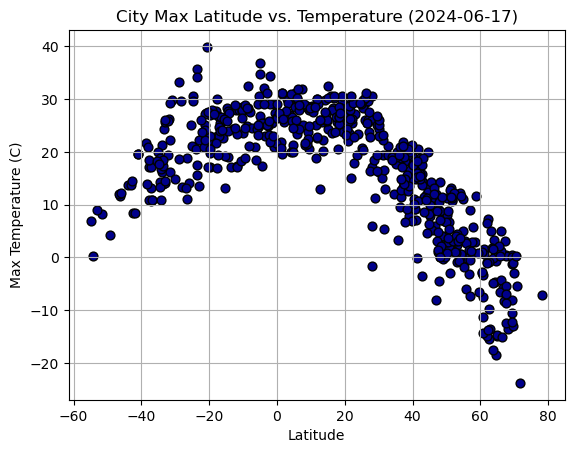

In [99]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', color = 'darkblue',edgecolor='black', s=40 , grid = True )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

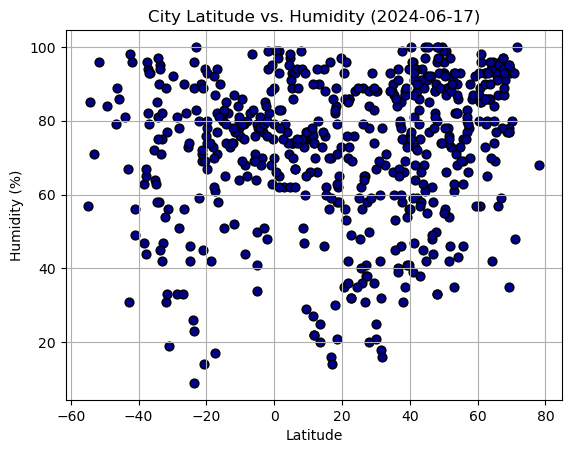

In [100]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', color = 'darkblue',edgecolor='black', s=40, grid = True )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

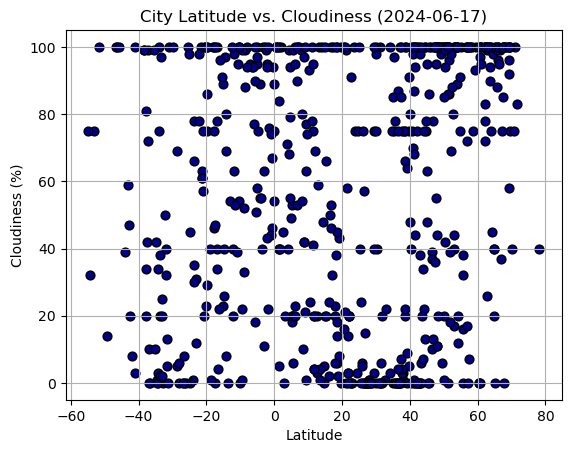

In [101]:
# Build scatter plot for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', color = 'darkblue',edgecolor='black',s=40, grid = True )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

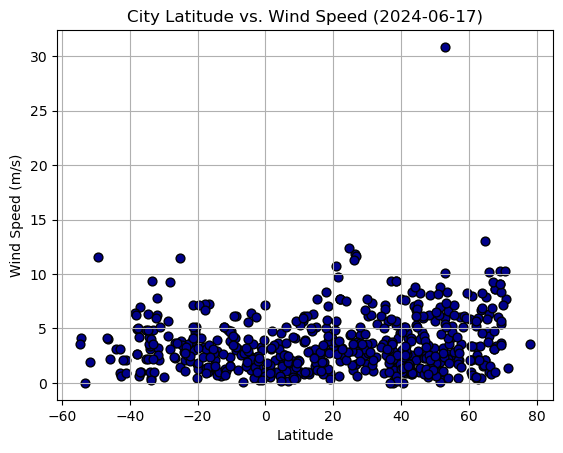

In [102]:
# Build scatter plot for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', color = 'darkblue',edgecolor='black',s=40, grid = True )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [137]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Annotate the line equation and R-squared value
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'
    r_eq = plt.annotate(line_eq, (0.05, 0.95), fontsize=12, color="red", ha='left', va='top', transform=plt.gca().transAxes)

    #display values
    return slope, intercept, r_value
    
    # Show plot
    plt.show()

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pankrushikha,53.8319,80.3406,0.42,90,100,2.63,RU,1730346326
1,kharakvasla,18.4333,73.7667,26.30,58,6,2.87,IN,1730346326
2,lensk,60.7253,114.9278,-7.52,89,97,1.00,RU,1730346326
4,tagiura,32.8817,13.3506,21.19,71,22,5.43,LY,1730346327
6,raduzhny,62.0961,77.4750,-0.82,86,100,3.28,RU,1730346327


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.79,81,39,3.13,NZ,1730346326
5,port alfred,-33.5906,26.8910,13.99,95,38,0.45,ZA,1730346327
11,tsiombe,-25.3000,45.4833,25.12,73,100,1.42,MG,1730346328
14,palpa,-14.5336,-75.1856,19.09,65,97,1.06,PE,1730346329
18,adamstown,-25.0660,-130.1015,21.10,74,98,11.43,PN,1730346330


###  Temperature vs. Latitude Linear Regression Plot

(-0.5604907904845785, 34.11893281998516, -0.8812759469857488)

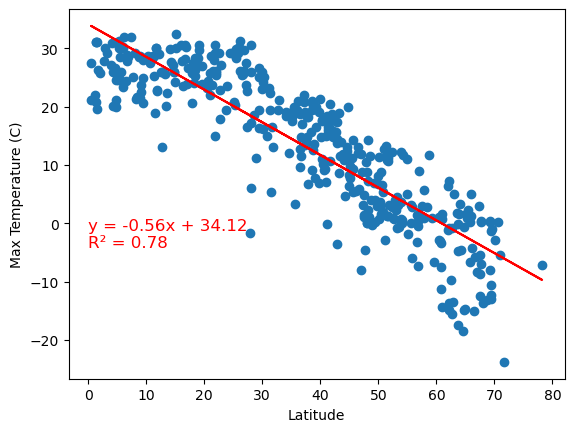

In [130]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (C)')

(0.31926363565468296, 28.58474823461228, 0.6451553500694539)

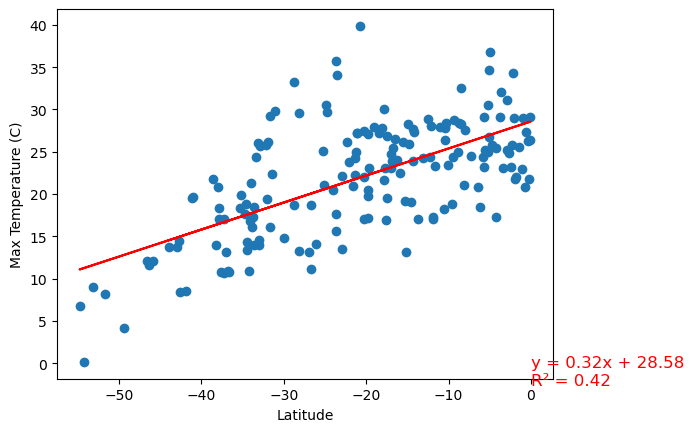

In [131]:
# Linear regression on Southern Hemisphe
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
create_linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Linear relationship response: The northern hemisphere shows to have a negative relationship with the latitude. As it increases the temperature decrease. The southern hemisphere is the opposite, as latitude inreases the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

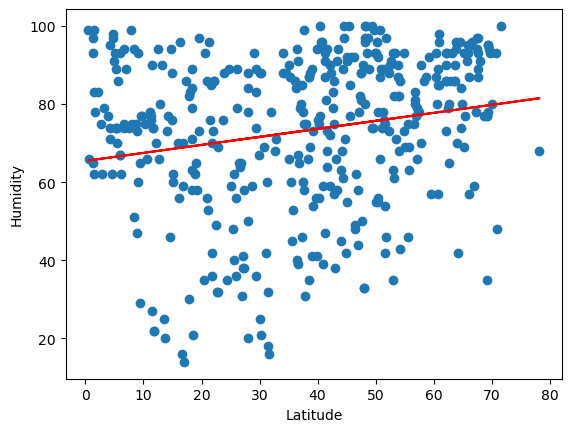

In [132]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity')

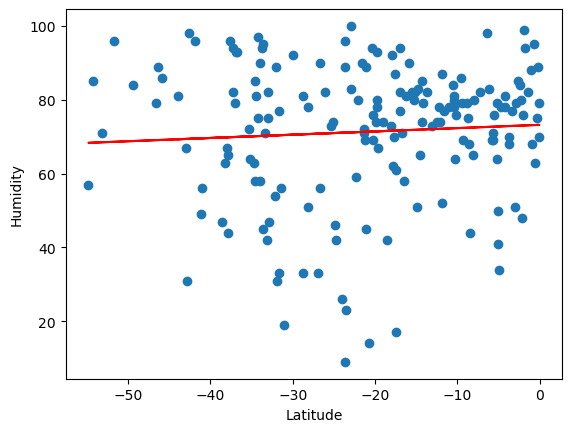

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The southern hemisphere has little to no change as the latitude increases or decreases according to the linear relationship but we can see many outliers above and belove the slope.

### Cloudiness vs. Latitude Linear Regression Plot

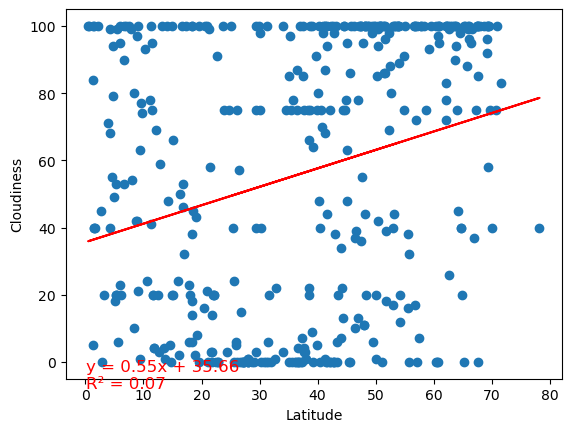

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness')

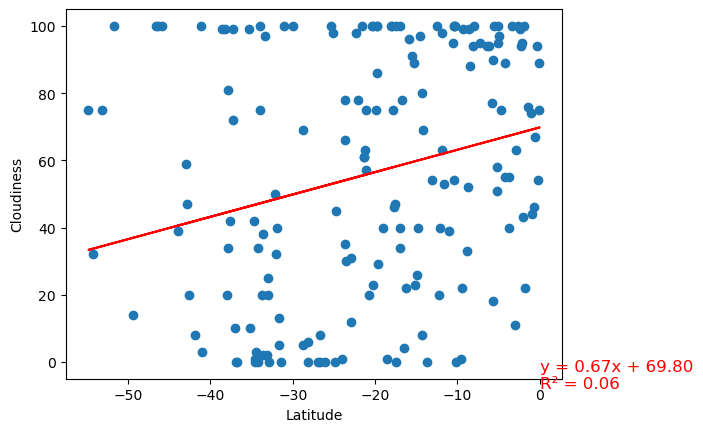

In [141]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** We observe that cloudiness has no correlation with the hemispheres only with the latitudes. This has to do with the atmopshere and amount of moisture needed to create those clouds that may not be as readily available in lower altitudes.

### Wind Speed vs. Latitude Linear Regression Plot

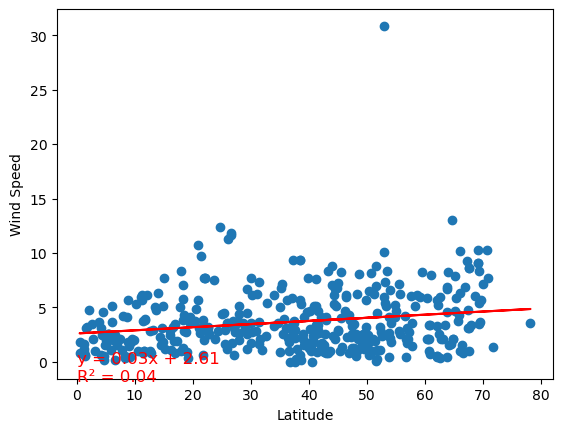

In [142]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed')

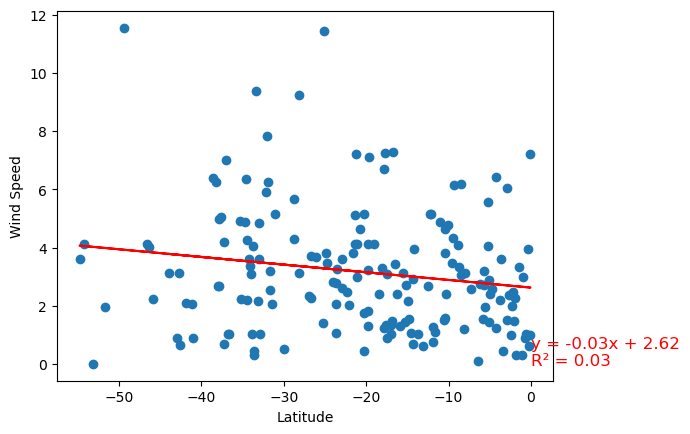

In [143]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, r_value = create_linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The wind speed for the northern hemisphere is very consistent and tends to fall below 15 mph. Where the sotuthern hemisphere has significantly lower wind speeds and tends to fall below 6 mph. These visualizations show us that there is more atmospheric activity in the northern hemisphere.